In [137]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [138]:
date = pd.read_csv('zapis 2023-2024.csv', delimiter =';', decimal =',')
date.head()

C:\Users\ANALIZY\AppData\Local\Temp\ipykernel_24260\71101493.py:1: DtypeWarning: Columns (4,5,15,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  date = pd.read_csv('zapis 2023-2024.csv', delimiter =';', decimal =',')


,Lp.,Mag.,Nazwa magazynu,Nazwa towaru/usługi,Symbol,Indeks (PLU),Jedn. miary,Kontrahent,Nr dok.,Data wprow.,...,Grupa t.,Kategoria1,Kategoria2,Kategoria3,Kategoria4,Kategoria5,Stan,Bieżąca Ilość na stanie,Ilość na pocz. okresu,Ilość na koniec okresu
0,1,M 6,MAGAZYN GŁÓWNY,..........Przyjedzie,1020347,1020347,NaN,Korekta ze spisu z natury,"Inw: ,godz:",06.01.2023,...,INNE,INNE,NaN,NaN,NaN,NaN,0.0,-201.6,1000.0,-201.6
1,2,M 6,MAGAZYN GŁÓWNY,..........Przyjedzie,1020347,1020347,NaN,"Firma Handlowa ""Dragon"" Sebastian Kozłowski",KK/01215/2024,12.07.2024,...,INNE,INNE,NaN,NaN,NaN,NaN,5.0,-201.6,1000.0,-201.6
2,3,M 6,MAGAZYN GŁÓWNY,..........Przyjedzie,1020347,1020347,NaN,"Firma Handlowa ""Dragon"" Sebastian Kozłowski",FV015639/2024,12.07.2024,...,INNE,INNE,NaN,NaN,NaN,NaN,0.0,-201.6,1000.0,-201.6
3,4,M 6,MAGAZYN GŁÓWNY,..........Przyjedzie,1020347,1020347,NaN,MPT STANRO Sp.z o.o.,FV018317/2024,12.08.2024,...,INNE,INNE,NaN,NaN,NaN,NaN,-6.0,-201.6,1000.0,-201.6
4,5,M 6,MAGAZYN GŁÓWNY,..........Przyjedzie,1020347,1020347,NaN,MPT STANRO Sp.z o.o.,FV019520/2024,26.08.2024,...,INNE,INNE,NaN,NaN,NaN,NaN,-19.0,-201.6,1000.0,-201.6


In [139]:
data1 = date[(date['Grupa t.']=='POMIDORY')]
data1 = data1[(data1['Typ dok']=="F.Sprz.")]
data_analyse = data1[['Grupa t.','Data wprow.','Cena sprzedaży (netto)','Ilość','Ilość przelicz.']]
data2 = data_analyse.groupby('Data wprow.')
#data2.head(5)

In [140]:
daty = data_analyse['Data wprow.'].unique()
#print(daty)
average_day = {}

for i in daty: 
    daily_data = data_analyse[data_analyse['Data wprow.'] == i]
    average = (daily_data['Cena sprzedaży (netto)'] *daily_data['Ilość']).sum() / daily_data['Ilość przelicz.'].sum()
    average_day[i]=abs(average)

cena_ważona  = pd.DataFrame( list(average_day.items()), columns = ["Data","Cena"])
cena_ważona['Data'] = pd.to_datetime(cena_ważona['Data'])
cena_ważona = cena_ważona.sort_values(by = 'Data')
cena_ważona = cena_ważona.reset_index()
cena_ważona = cena_ważona.drop(columns=['index'])
cena_ważona

C:\Users\ANALIZY\AppData\Local\Temp\ipykernel_24260\902544985.py:11: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cena_ważona['Data'] = pd.to_datetime(cena_ważona['Data'])


,Data,Cena
0,2023-01-02,6.817712
1,2023-01-03,7.877944
2,2023-01-04,12.511917
3,2023-01-05,9.695742
4,2023-01-07,8.959264
...,...,...
665,2024-11-08,9.568884
666,2024-11-09,10.820077
667,2024-11-11,10.039382
668,2024-11-12,11.874887


In [141]:
cena_ważona['tydzien'] = cena_ważona['Data'].dt.isocalendar().week
cena_ważona['rok'] = cena_ważona['Data'].dt.isocalendar().year

max_tydzien = cena_ważona.groupby(['rok', 'tydzien'])['Cena'].min().reset_index()   #.agg(['min','max'])
min_tydzien = cena_ważona.groupby(['rok', 'tydzien'])['Cena'].max().reset_index()
open_tydzien = cena_ważona.groupby(['rok', 'tydzien'])['Cena'].first().reset_index()
close_tydzien = cena_ważona.groupby(['rok', 'tydzien'])['Cena'].last().reset_index()
openclose = pd.merge(open_tydzien,close_tydzien,on = ['rok','tydzien'])
minmax= pd.merge(max_tydzien,min_tydzien,on = ['rok','tydzien'])
fulloption = pd.merge(minmax,openclose,on = ['rok','tydzien'])
analiza = fulloption.rename(columns= {'Cena_x_x' : 'Cena_min', 'Cena_y_x' : 'Cena_max','Cena_x_y':'Cena_open','Cena_y_y':'Cena_close'})
analiza['data']= pd.to_datetime(fulloption['rok'].astype(str)+fulloption['tydzien'].astype(str)+'1',format='%Y%W%w')
analiza


,rok,tydzien,Cena_min,Cena_max,Cena_open,Cena_close,data
0,2023,1,6.817712,12.995932,6.817712,12.995932,2023-01-02
1,2023,2,7.396928,13.690000,9.445419,13.236648,2023-01-09
2,2023,3,8.617339,12.427049,10.557460,12.427049,2023-01-16
3,2023,4,7.995099,12.698013,9.545315,12.049180,2023-01-23
4,2023,5,8.848432,15.098701,8.848432,15.098701,2023-01-30
...,...,...,...,...,...,...,...
93,2024,42,10.036629,12.620157,10.036629,10.249489,2024-10-14
94,2024,43,9.440321,13.182986,11.644407,9.440321,2024-10-21
95,2024,44,9.794771,12.935341,11.906785,11.558647,2024-10-28
96,2024,45,9.061851,11.198420,11.198420,10.820077,2024-11-04


In [142]:
high_analiza = analiza[analiza['Cena_close'] > analiza['Cena_open']].copy()
high_analiza['wzrost'] = high_analiza['Cena_close'] - high_analiza['Cena_open']
#high_analiza
low_analiza = analiza[analiza['Cena_close'] < analiza['Cena_open']].copy()
low_analiza['spadek'] = low_analiza['Cena_open'] - low_analiza['Cena_close']
#low_analiza
#SMA
cena_ważona['SMA_10'] = cena_ważona['Cena'].rolling(window = 10 ).mean()

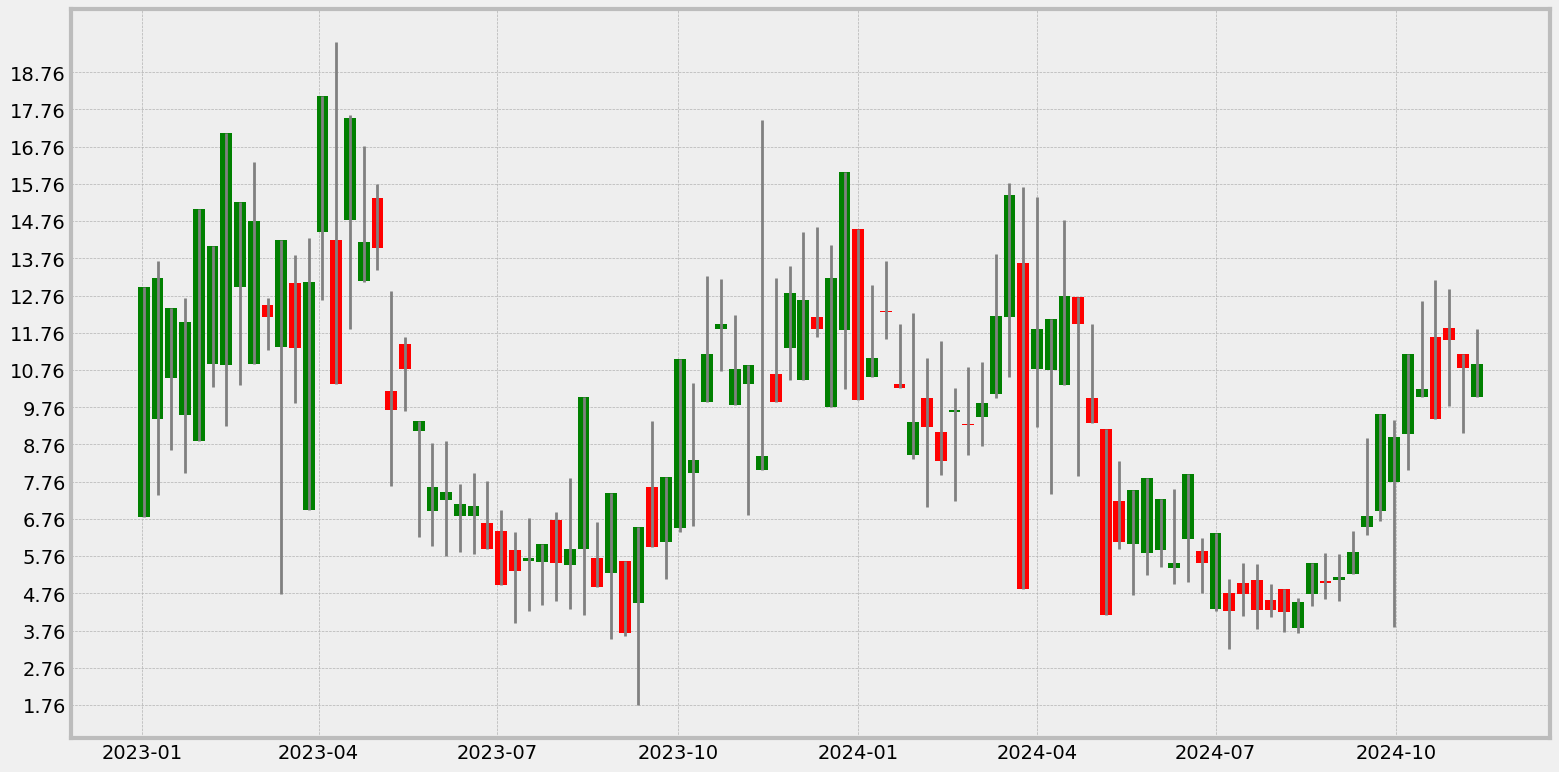

In [ ]:
plt.style.use("classic")

plt.figure(figsize=(17,9))
plt.vlines(x=analiza['data'],ymin=analiza['Cena_min'],ymax=analiza['Cena_max'],color= 'grey')
# wzrot
plt.bar(x=high_analiza['data'],height=high_analiza['wzrost'],bottom=high_analiza['Cena_open'],color ='green', width=6)
#spadek
plt.bar(x=low_analiza['data'],height=low_analiza['spadek'],bottom=low_analiza['Cena_close'],color ='red', width=6)




#SMA
"""
cena_ważona['SMA_10'] = cena_ważona['Cena'].rolling(window = 10 ).mean()
sma= cena_ważona['SMA_10']
x=cena_ważona['Data']
plt.plot(x,sma)
"""

plt.yticks(np.arange(cena_ważona['Cena'].min(), cena_ważona['Cena'].max(), 1))
plt.show()